### Links
Tutorial Link: https://medium.com/hacktive-devs/recommender-system-made-easy-with-scikit-surprise-569cbb689824

Data source: https://grouplens.org/datasets/movielens/100k/

Link to surprise documentation: https://surprise.readthedocs.io/en/stable/index.html

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('ratings_small.csv')

In [23]:
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [24]:
data.shape

(100004, 4)

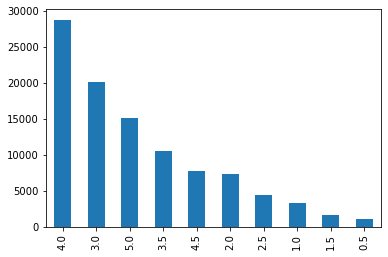

In [25]:

data.rating.value_counts().plot(kind='bar')
plt.show()

#### Check for null values in data

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [27]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### subset the data for relevant columns
https://medium.com/hacktive-devs/recommender-system-made-easy-with-scikit-surprise-569cbb689824

In [28]:
data = data[['userId', 'movieId', 'rating', 'timestamp']]
data = data.iloc[:, :-1]

In [29]:
data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [30]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [16]:
#data.columns = ['userId','movieId','raw_ratings']

In [31]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [36]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [37]:
predictions = algo.test(testset)

In [41]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.8976


0.8975957886963194

In [42]:
predictions

[Prediction(uid=596, iid=350, r_ui=3.5, est=3.402921621277861, details={'was_impossible': False}),
 Prediction(uid=460, iid=348, r_ui=2.0, est=3.8037599452796895, details={'was_impossible': False}),
 Prediction(uid=537, iid=1051, r_ui=2.0, est=3.848091251943258, details={'was_impossible': False}),
 Prediction(uid=282, iid=1777, r_ui=4.0, est=3.0773834170017698, details={'was_impossible': False}),
 Prediction(uid=402, iid=88140, r_ui=4.0, est=3.7108053354216066, details={'was_impossible': False}),
 Prediction(uid=102, iid=58, r_ui=4.0, est=4.384611102090494, details={'was_impossible': False}),
 Prediction(uid=442, iid=33615, r_ui=4.5, est=4.02260464420974, details={'was_impossible': False}),
 Prediction(uid=303, iid=6218, r_ui=4.0, est=3.1626436869799033, details={'was_impossible': False}),
 Prediction(uid=518, iid=2453, r_ui=3.0, est=3.648121985847976, details={'was_impossible': False}),
 Prediction(uid=547, iid=1994, r_ui=4.5, est=3.8003109789535734, details={'was_impossible': False})